## Brief History of Video Games

Wikipedia defines video game as:<br>
"An electronic game that involves interaction with a user interface to generate visual feedback on a two or three dimensional video display device such as Tv, virtual reality or computer monitor". The 1980s brought about the rise of Video Games thanks to video arcades. With the release of consoles, it caused a decline in Video arcades, since consoles provided a more affordable way to play video games.

### About the Dataset used

This dataset was generated by a scrape of vgchartz.com, and 
can be found on <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>. This dataset was made by Kaggle User GregorySmith. The dataset contains the sales of Video Games from 1980-2016

In [2]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

VGS = pd.read_csv(r'...vgsales.csv')

In [3]:
VGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After storing the data into a dataframe, I decided to check out the info about the data so
we can see what we're working with. There is not any null values, so it looks like we're good 
to go. 

# Looking at Global sales yearly

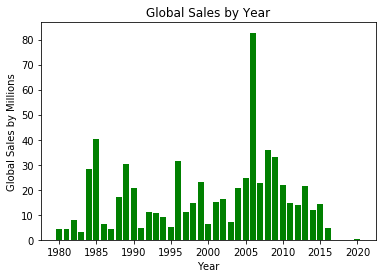

In [14]:
#Line Graph between Global_sales and Year
x = VGS['Year']
y = VGS['Global_Sales']
plt.bar(x,y, color='g')
plt.xlabel('Year')
plt.ylabel('Global Sales by Millions')
plt.title('Global Sales by Year')
plt.show()


1985, 1996, and 2006 caused huge spikes in Global Sales. What were the publishers that had the most sales that year? 

## 1985

In [35]:
Year_1985 = VGS[VGS['Year']==1985]
Year_1985.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
374,375,Kung Fu,NES,1985.0,Action,Nintendo,1.64,0.38,1.42,0.06,3.50
868,870,Soccer,NES,1985.0,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96
1260,1262,Ice Climber,NES,1985.0,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50
1490,1492,Gyromite,NES,1985.0,Puzzle,Nintendo,0.73,0.16,0.40,0.03,1.32
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,0.00,0.00,1.05,0.00,1.05
2020,2022,Bomberman,NES,1985.0,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03
2059,2061,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00
2259,2261,Balloon Fight,NES,1985.0,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92
3907,3909,Wrecking Crew,NES,1985.0,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51


Since we are only looking at Global Sales, it would make more sense to drop the other Sales columns.

In [51]:
Global_1985 = VGS.drop(VGS.columns[6:10], axis =1)
print(Global_1985.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Global_Sales'],
      dtype='object')


Cool now that we dropped the columns we don't need, lets take a look at what we got left.

In [52]:
Year_1985updated = Global_1985[Global_1985['Year'] == 1985]
Year_1985updated.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
374,375,Kung Fu,NES,1985.0,Action,Nintendo,3.50
868,870,Soccer,NES,1985.0,Sports,Nintendo,1.96
1260,1262,Ice Climber,NES,1985.0,Platform,Nintendo,1.50
1490,1492,Gyromite,NES,1985.0,Puzzle,Nintendo,1.32
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,1.05
2020,2022,Bomberman,NES,1985.0,Puzzle,Hudson Soft,1.03
2059,2061,1942,NES,1985.0,Shooter,Capcom,1.00
2259,2261,Balloon Fight,NES,1985.0,Platform,Nintendo,0.92
3907,3909,Wrecking Crew,NES,1985.0,Platform,Nintendo,0.51


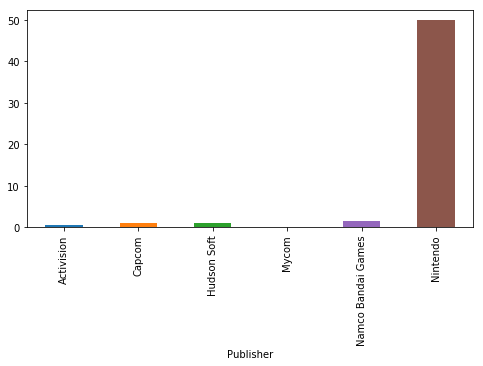

In [59]:
%matplotlib inline
plt.figure(figsize(8,4))
Publisher_1985 = Year_1985updated['Global_Sales'].groupby(Year_1985updated['Publisher'])
Publisher_1985.sum().plot(kind = 'bar')

Wow! Turns out 1985 was a very good year for Nintendo. Nintendo dominated with about 50 million
in sales with games, globally! The remaining publishers barely broke 10 million! 

For context, 1985 was the year the NES was released in American Markets. With the release of the NES 
in the states, it helped revitalize what was the failing video game industry! Let's take a look at the
games that was sold in 1985 and their numbers in the NA market. 

In [62]:
NA_1985 = VGS.drop(VGS.columns[7:], axis=1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
